In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import cv2
import skimage.io
import numpy as np
import vgg19 as vgg19
import tensorflow as tf
import skimage.transform
import matplotlib.pyplot as plt

from utils import flip_image
from utils import invert_mask
from utils import make_sandwich
from utils import gimme_img_size
from utils import combine_images
from utils import preserve_content_color

from transfer import tensor_transfer
from tensorflow.contrib.opt import ScipyOptimizerInterface

In [11]:
content_image_path = 'content_images/petr.jpg'
content_image = skimage.io.imread(content_image_path)[:,:,0:3]
#img_size = [300,500]
#content_image = skimage.transform.resize(content_image,img_size,mode='reflect')

style_image_path = 'style_images/rain-princess-aframov.jpg'
style_image = skimage.io.imread(style_image_path)[:,:,0:3]

mask_path = 'content_images/petr_mask.jpg'
mask = skimage.io.imread(mask_path)[:,:,0:3]
#mask = invert_mask(mask)
sandwich ,mask = make_sandwich(content_image,style_image,initial_generated_image=3,mask=mask)

# case_1 initial_generated_image = content_image.
# case_2 initial_generated_image = content_image + noise.
# case_3 initial_generated_image = noise.
# case_4 initial_generated_image = content_image with lumina transfer from style_image
# case_5 initial_generated_image = content_image with flipped (lumina transfer from style_image)
# case_6 initial_generated_image = content_image + noise with flipped (lumina transfer from style_image)
# case_7 initial_generated_image = noise with lumina transfer from style_image
# case_8 initial_generated_image = noise with flip-flipped (lumina transfer from style_image)

print(sandwich.shape)

(3, 375, 266, 3)


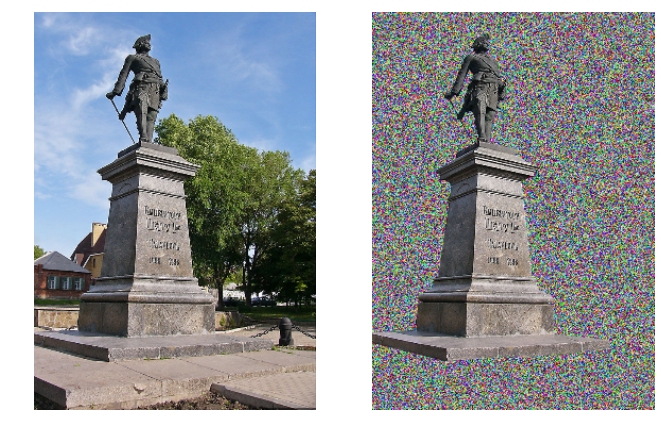

In [12]:
fig = plt.figure('1',figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1);plt.axis('off');plt.imshow((sandwich[0]))
plt.subplot(1,2,2);plt.axis('off');plt.imshow((sandwich[2]))
plt.show()

C:\Users\USER\OneDrive\Documents\style_transfer\vgg19_fc_less.npy
npy file loaded
build model started
build model finished: 0s
total loss 5970.58
noise loss 0.258222
content_loss 54085.3
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
  Objective function value: 1122.894531
  Number of iterations: 21
  Number of functions evaluations: 25


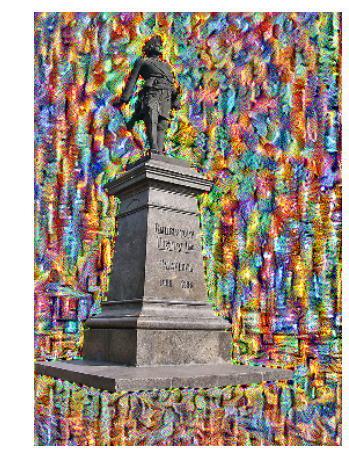

C:\Users\USER\OneDrive\Documents\style_transfer\vgg19_fc_less.npy
npy file loaded
build model started
build model finished: 0s
total loss 1122.89
noise loss 0.190174
content_loss 72522.7
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
  Objective function value: 899.678345
  Number of iterations: 21
  Number of functions evaluations: 24


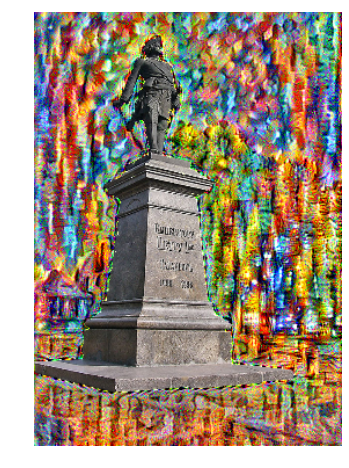

In [13]:
for i in range(2):
    sandwich = tensor_transfer(sandwich,style_weights_mode=2,content_coef=1e-2,noise_coef=5e2,mask=mask)
    #style_weights_mode=1: style_weights = sess.run(set_style_weights(layers))
    #style_weights_mode=2: style_weights = {'conv1_1':0.2,'conv2_1':0.2,'conv3_1':0.2,'conv4_1':0.2,'conv5_1':0.2}
    #style_weights_mode=3: style_weights = {'conv1_1':.2,'conv2_1':.4,'conv3_1':.8,'conv4_1':1.6,'conv5_1':3.2}
    fig = plt.figure('1',figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k');plt.axis('off')
    plt.imshow(sandwich[2]);plt.show()  

D:\jupyter\style_transfer\vgg19_fc_less.npy
npy file loaded
build model started
build model finished: 0s
from 0.04231
noise loss 0.311908
content_loss 31710.6
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
  Objective function value: 0.024744
  Number of iterations: 21
  Number of functions evaluations: 23


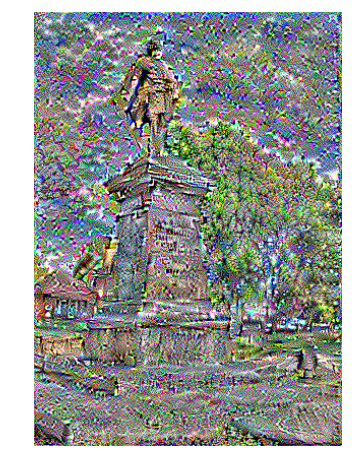

D:\jupyter\style_transfer\vgg19_fc_less.npy
npy file loaded
build model started
build model finished: 0s
from 0.0247444
noise loss 0.300395
content_loss 25157.9
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
  Objective function value: 0.017036
  Number of iterations: 21
  Number of functions evaluations: 23


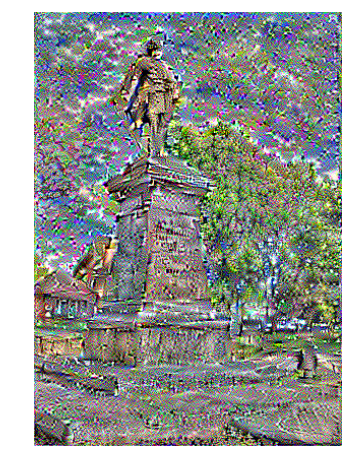

In [32]:
for i in range(2):
    sandwich = tensor_transfer(sandwich,style_weights_mode=0,content_coef=1e-3,noise_coef=0)
    #style_weights_mode=1: style_weights = sess.run(set_style_weights(layers))
    #style_weights_mode=2: style_weights = {'conv1_1':0.2,'conv2_1':0.2,'conv3_1':0.2,'conv4_1':0.2,'conv5_1':0.2}
    #style_weights_mode=3: style_weights = {'conv1_1':.2,'conv2_1':.4,'conv3_1':.8,'conv4_1':1.6,'conv5_1':3.2}
    fig = plt.figure('1',figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k');plt.axis('off')
    plt.imshow(sandwich[2]);plt.show()  

In [106]:
content_image = sandwich[2]

style_image_path = 'style_images/udnie.jpg'
style_image = skimage.io.imread(style_image_path)[:,:,0:3]

In [107]:
mask = invert_mask(mask)
sandwich, mask  = make_sandwich(content_image,style_image,initial_generated_image=1,mask=mask)

# case_1 initial_generated_image = content_image.
# case_2 initial_generated_image = content_image + noise.
# case_3 initial_generated_image = noise.
# case_4 initial_generated_image = content_image with lumina transfer from style_image
# case_5 initial_generated_image = content_image with flipped (lumina transfer from style_image)
# case_6 initial_generated_image = content_image + noise with flipped (lumina transfer from style_image)
# case_7 initial_generated_image = noise with lumina transfer from style_image
# case_8 initial_generated_image = noise with flip-flipped (lumina transfer from style_image)

print(sandwich.shape)

(3, 460, 325, 3)


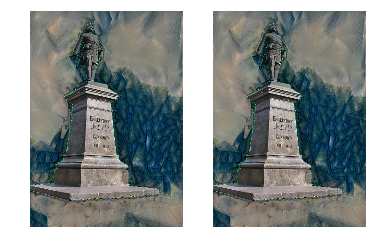

In [108]:
plt.subplot(1,2,1);plt.axis('off');plt.imshow((sandwich[0]))
plt.subplot(1,2,2);plt.axis('off');plt.imshow((sandwich[2]))
plt.show()

D:\jupyter\style_transfer\vgg19_fc_less.npy
npy file loaded
build model started
build model finished: 0s
from 113.809
noise loss 0.00716588
content_loss 3321.79
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
  Objective function value: 41.690548
  Number of iterations: 21
  Number of functions evaluations: 23


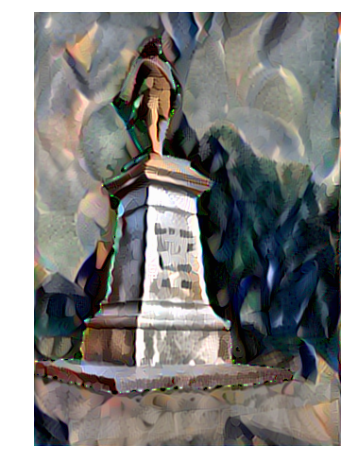

D:\jupyter\style_transfer\vgg19_fc_less.npy
npy file loaded
build model started
build model finished: 0s
from 124.842
noise loss 0.00626978
content_loss 9286.26
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
  Objective function value: 63.759281
  Number of iterations: 21
  Number of functions evaluations: 23


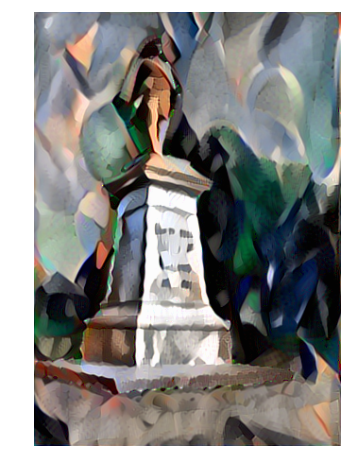

In [111]:
for i in range(2):
    sandwich = tensor_transfer(sandwich,content_coef=2e-3,noise_coef=1e3)   
    fig = plt.figure('1',figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k');plt.axis('off')
    plt.imshow(sandwich[2]);plt.show()

In [112]:
plt.imsave('generated/petr_mask_4',sandwich[2])